# Giving life to the Lotka-Volterra equations

The [Lotka-Volterra equations](https://en.wikipedia.org/wiki/Lotka%E2%80%93Volterra_equations) have more or less laid the foundations of all population dynamics. It's the first thing any bio-mathematician learn, and, as such, they have been [extensively studied](https://www.sciencedirect.com/topics/agricultural-and-biological-sciences/lotka-volterra-equation). There is some very good material out there to [understand the system](https://scipy-cookbook.readthedocs.io/items/LoktaVolterraTutorial.html), so I won't dwell too much onto the mathematical details. What I really want to do in this post is to give them life, using the processing language.

## A brief introduction to the equations
Let's first briefly look at the equations. Consider two populations, the preys $x$ and the predators $y$. Let's assume that the preys reproduce with a relative rate $a$, and get killed by the predators at a rate $b$. Conversely, the predators starve/die at rate $c$, and grow at rade $d$. This system can be summed up as:

$$x'(t) = a \cdot x(t) - b \cdot x(t) \cdot y(t)$$
$$y'(t) = -c \cdot y(t) + d \cdot x(t) \cdot y(t)$$

with a given initial condition: 

$$x(0) = x_0$$
$$y(0) = y_0$$

This is a first order ODE, so this is extremely simple to simulate. Let's have a look at what types of behaviors we can get.

In [1]:
# Make a few imports for what follows
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style("whitegrid", {'axes.grid' : False})
from scipy.integrate import odeint
from IPython.display import HTML

# High resolution plot
import matplotlib_inline.backend_inline as backend_inline 
backend_inline.set_matplotlib_formats('png2x')



In [2]:
# Set the system
f = lambda x, t: [a*x[0] - b*x[0]*x[1], -c*x[1] + d*x[0]*x[1]]

Let's now define a function to look at the results both in time (temporal traces), and in the phase space.

In [3]:
def plot_lk(t, x):
    
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (15,5))

    axes[0].plot(t, x[:,0], 'C0')
    axes[0].plot(t, x[:,1], 'C1')
    axes[0].set_xlabel('Time')
    axes[0].set_ylabel('Population')
    axes[0].legend(('Prey','Predator'))

    axes[1].plot(x[:,0], x[:,1], 'C2')
    axes[1].set_xlabel('Prey')
    axes[1].set_ylabel('Predator')

    #fig.tight_layout()
    sns.despine(offset=10, trim=True);
    plt.savefig("test.pdf")
    plt.show()

Let's try the simplest possible range of parameters.

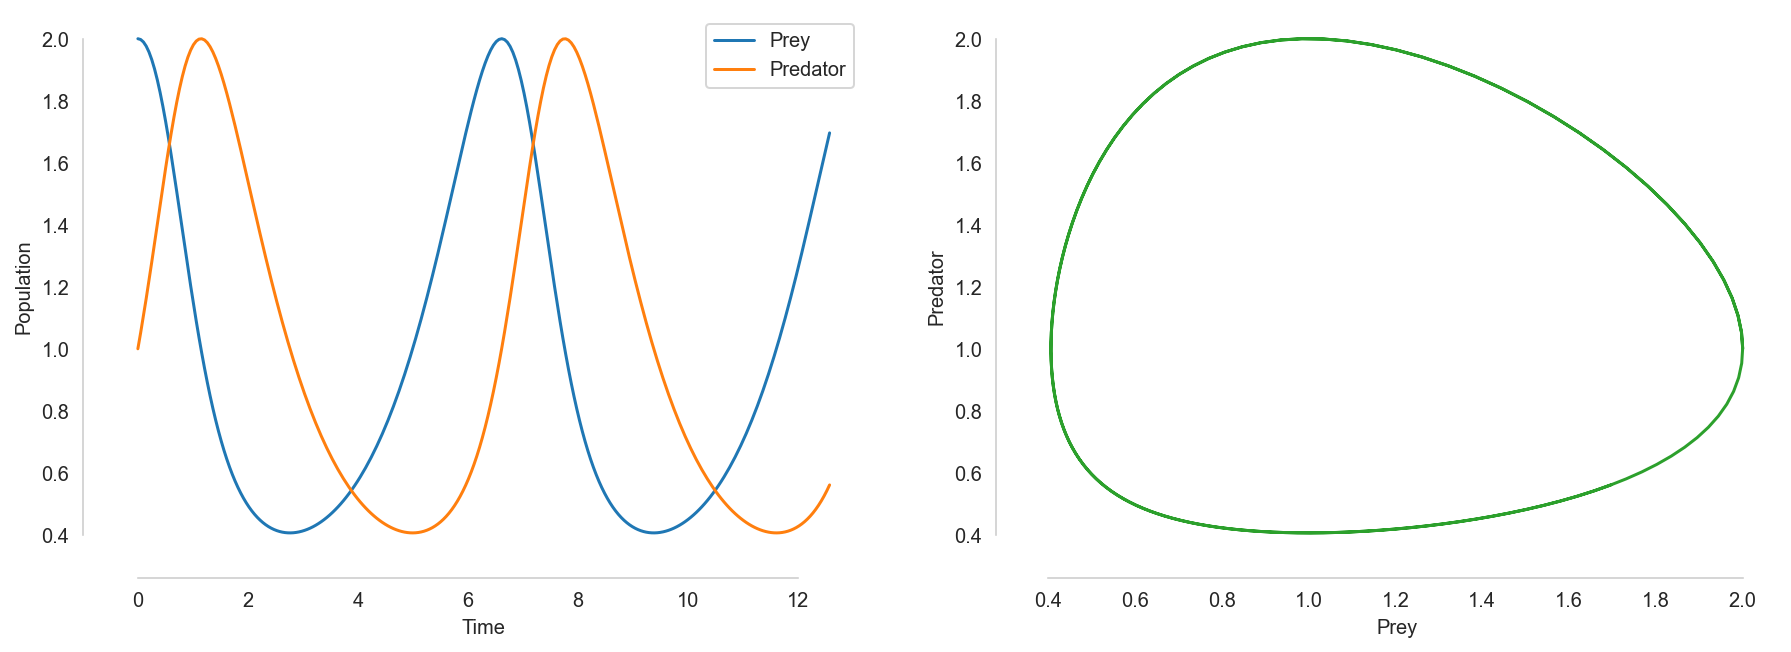

In [4]:
a = 1
b = 1
c = 1
d = 1

x_0 = [2, 1]
tspan = np.linspace(0, 4*np.pi, 250)

x = odeint(f, x_0, tspan)

plot_lk(tspan, x)

This leads to really nice oscillations: when the prey population gets important, they get eaten by predators. The prey population gets reduced, and the predators starve right after... This is basically the textbook case of Lotka-Volterra.

## Simulating a real-case scenario of predation using p5.js

Is there a more intuitive way of observing this result? Well, there exists some really powerful tools to make some simple simulations using javascript. The most famous is probably [D3](https://d3js.org/), but I decided to use [Processing](https://processing.org/) (or more exactly, its javascript alter-ego, p5.js), as it is more orentied toward classic programming instead of web-development.

Although it is actually quite complex, I highly encourage you to check the [code](https://github.com/ColasDroin/Jupyter-notebooks/blob/master/lotka.js). But it's too long to be contained in this notebook so I decided not to show it here. I built upon [this example](https://p5js.org/examples/hello-p5-flocking.html) to gain time. Just click to reset the simulation.

In [6]:
from IPython.display import IFrame
IFrame('https://colasdroin.github.io/lotka/', width=1050, height=500)